# Olasılık: empirik şekilde pi’yi bulmak

## Rastgele veri üret 
$n$ adet 2 boytulu veri üret. Her bir boyut $[-1, 1]$ aralığında olsun.

```
import random
# r [0, 1] aralığında
r = random.random()

# r [-1, 1] aralığında
r = 2 * r - 1
```

## Kaç tanesi daire içinde kaldığını hesapla
Verilerin kaçı merkezi orijin olan ve yarıçapı 1 olan daire içinde kaldığını hesapla. Bu değere $d$ diyelim.


```
import math
# Öklid Mesafesi
mesafe = math.sqrt(x**2 + y**2)

# Daire icinde mi
if mesafe < 1:
    return True
return False
```

## Empirik şekilde pi’yi hesapla
$$
4 \times \frac{d}{n} \approx \pi
$$

## Hata analizi
$$
hata = 4 \times \frac{d}{n} - \pi
$$

$n$ arttikça hata değerimiz nasıl değiştiğini ölç.



In [1]:
import random
# r [0, 1] aralığında
r = random.random()

# r [-1, 1] aralığında
r = 2 * r - 1

In [2]:
def veri_uret():
    """
    return:
        2 boytulu veri üret. 
        Her bir boyut $[-1, 1]$ aralığında olsun.
    """
    x = 2 * random.random() - 1
    y = 2 * random.random() - 1

    return x,y

In [3]:
veri_uret()

(0.4151211812223603, -0.8317588275251135)

In [4]:
import math

x, y = veri_uret()
print(x,y)
# Öklid Mesafesi
mesafe = math.sqrt(x**2 + y**2)

# Daire icinde mi
if mesafe < 1:
    print(True)


-0.01156091861702313 -0.498636235286668
True


In [5]:
def daire_icinde_mi(veri):
    """
    parametre:
        veri 2 boyutlu 
        Her bir boyut $[-1, 1]$ aralığında 
    
    """
    x, y = veri
    # Öklid Mesafesi
    mesafe = math.sqrt(x**2 + y**2)

    # Daire icinde mi
    if mesafe < 1:
        return True
    return False

In [6]:
veri = veri_uret()
print(veri)
daire_icinde_mi(veri)

(-0.8547771096727255, -0.7631228915276262)


False

## Kod

In [7]:
import random
import math
random.seed(42)

def veri_uret():
    """
    return:
        2 boytulu veri üret. 
        Her bir boyut $[-1, 1]$ aralığında olsun.
    """
    x = 2 * random.random() - 1
    y = 2 * random.random() - 1

    return x,y

def daire_icinde_mi(veri):
    """
    parametre:
        veri 2 boyutlu 
        Her bir boyut $[-1, 1]$ aralığında 
    
    """
    x, y = veri
    # Öklid Mesafesi
    mesafe = math.sqrt(x**2 + y**2)

    # Daire icinde mi
    if mesafe < 1:
        return True
    return False

In [8]:
veri = veri_uret()
print(veri)
daire_icinde_mi(veri) # (0.2788535969157675, -0.9499784895546661)

(0.2788535969157675, -0.9499784895546661)


True

In [9]:
def pi_hesapla(n = 10000):
    """
    Empirik sekilde pi'yi hesapla
    """
    veriler = [veri_uret() for i in range(n)]

    d = 0
    for veri in veriler:
        if daire_icinde_mi(veri):
            d +=1
            
    return 4 * d / n

In [10]:
pi_hesapla(n = 10000)

3.1392

# Hata Analizi

In [11]:
math.pi

3.141592653589793

In [36]:
pi_hesapla(n = 100) 

3.24

In [35]:
pi_hesapla(n = 100000) 

3.13628

In [12]:
pi_hesapla(n = 100000) # 3.14252

3.14252

In [13]:
pi_hesapla(n = 1000000) # 3.140028

3.140028

In [14]:
pi_hesapla(n = 1000000) # 3.143368

3.143368

## Ortalama Deger

20 Kosturmanin ortalamasi

In [15]:
def hata(n = 100, k = 20):
    pi = 0
    for i in range(k):
        pi += pi_hesapla(n)
    pi = pi / k
    
    return abs(math.pi - pi)

In [16]:
hata(n = 100, k = 20)

0.07640734641020774

In [17]:
ns = [i * 10 for i in range(1, 300)]
hatalar = [hata(n = n, k = 20) for n in ns]    

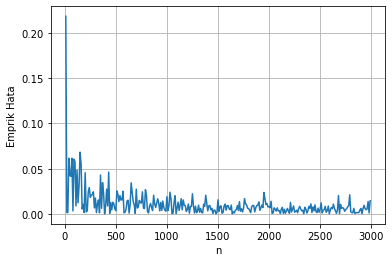

In [18]:
import matplotlib.pyplot as plt


plt.plot(ns, hatalar)
plt.xlabel('n')
plt.ylabel('Emprik Hata')
plt.grid()